# Stochastic Simulation algorithm: Gillespie 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Arrays in NumPy

In [3]:
arr = np.array([[0,2,4],[6,8,10]]) 
app_arr=np.append(arr, [[5,7,9],[1,13,15]],axis = 0)
app_arr

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [ 5,  7,  9],
       [ 1, 13, 15]])

In [5]:
sum(app_arr[0])

6

In [30]:
app_arr[-1]

array([ 1, 13, 15])

Predefined arrays

In [4]:
np.zeros(3)

array([0., 0., 0.])

In [7]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

List comprehension

In [12]:
onearray = [a for a in range(4)]
onearray

[0, 1, 2, 3]

List operations

In [13]:
np.ones(3) + np.ones(3)

array([2., 2., 2.])

In [14]:
np.ones(4) + onearray

array([1., 2., 3., 4.])

In [15]:
type(onearray)

list

In [16]:
type(np.ones(4))

numpy.ndarray

In [17]:
type(np.ones(4) + onearray)

numpy.ndarray

Type casting

In [18]:
onearray = np.array(onearray)
type(onearray)

numpy.ndarray

In [19]:
onearray * onearray

array([0, 1, 4, 9])

In [29]:
len(onearray)

4

In [30]:
len(onearray.transpose())

4

In [31]:
np.ones((3,3)) + onearray

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

In [32]:
np.ones((3,4)) + onearray

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

Append array

In [17]:
arr = np.array([[0,2,4],[6,8,10]]) 
app_arr=np.append(arr, [[5,7,9],[13,15,17]],axis = 1) 
app_arr

array([[ 0,  2,  4,  5,  7,  9],
       [ 6,  8, 10, 13, 15, 17]])

In [6]:
for VARIABLETHATNEVEREXISTED in range(10):
    if VARIABLETHATNEVEREXISTED >5:
        break;
VARIABLETHATNEVEREXISTED

6

### Finish this Gillespie Allgorithm!!

In [7]:
# X0 starting state
# T  list of jumping times
# tend stop when reaching this time
# M  stoichiometric matrix
# k  list of reaction constants
# prop_f function that computes the porpensities of each reaction

def ssa_step(X0,T,tend,M,k,prop_f,batch_size=1000):
    

    x0 = X0[-1]  # take last value
    t  = T[-1]   # take last time
    K  = M.shape[0] # number of reactions

    newX = np.zeros( [batch_size,len(x0)] ) # we create a new matrix of values, that will be filled one at a time
                                            # If it is not big enough, we will enlarge it
    newT = np.zeros( batch_size ) 
    
    index = 0 # this is the index to the current position in the matrix.
    while t<tend:
        a = prop_f(x0,k)  # compute the propensity values "a", using prop_f 
        # compute the total propensity a_tot

        #normalize the propensity a = a/a_tot
        
        r1 = np.random.random() # generate the first random number using np.random.random() to compute jumping time
        # compute tau, the time for the next jump
        
        newT[index] = t = t + tau # this updates t to be t+tau, and also save it in the list newT

        # generate the second random number to select reaction
        r2 = np.random.random()
        
        acum = 0.0
        reaction = 0
        # select the reaction according to r2
        for i in range(K): # number of reactions
            # accumulate in acum
            # update reaction
            if acum>r2:
                break;    
            
        newX[index] = x0 = x0 + M[reaction]
        index += 1 # this increments the index
        
        #
        #  Dont touch this. This extends the array newT and newX if needed
        #
        if index%batch_size == 0: # if you filled the whole batch, add more space
            newX = np.append(newX,np.zeros( [batch_size,len(x0)] ),axis=0)
            newT = np.append(newT,np.zeros( batch_size ))
            
    return np.append(X0,newX[0:index,:],axis=0), np.append(T,newT[0:index])  

In [8]:

X0 = np.zeros([1,4])
X0[0] = [1, 0, 0, 0] # this is the drunken man in his bedroom
X0

array([[1., 0., 0., 0.]])

In [10]:

X0 = np.array([[1, 0, 0, 0]])
X0

array([[1, 0, 0, 0]])

## Drunken man

In [21]:
# Drunken man setting
# bed -[β]-> bath
# bed -[β]-> living
# bath -[β]-> bed
# bath -[β]-> living
# living -[η]-> bed
# living -[η]-> bath
# living -[η]-> kitchen
# kitchen -[δ]-> living


#     I -[μ]-> R

np.random.seed(123)

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    return np.array([k[0]*x[0]/2,
                     k[0]*x[1]/2,
                    ...
                    ...
                    ...
                    ] )

X0 = np.zeros([1,4])
X0[0] = [10000, 0, 0, 0] # this is the drunken man in his bedroom

#X0 = np.array([[1, 0, 0, 0]])
T = np.zeros(1)

# Fill here the stechiometric matrix
M = np.array([[-1, 1, 0, 0] ,# Infectious reaction
              [ 1, -1, 0, 0] ,
             ...
             ...
             ...
             
             ]) # Recovery reaction

k = np.array([0.1] )  # overall rate

In [22]:
# run your simulation
X0, T = ssa_step(X0,T,50.0,M,k,propensity_f)

In [33]:
plt.plot(T,X0[:,0])
plt.plot(T,X0[:,1])
plt.plot(T,X0[:,2])
plt.plot(T,X0[:,3])

NameError: name 'T' is not defined

### Testing the solution is correct:

In [24]:
print("Gillespie  converged  to:",X0[-1],"\nAnalytical prediction is:",np.array([2,2,3,1]) /(2+3+2+1))

Gillespie  converged  to: [2554. 2520. 3721. 1205.] 
Analytical prediction is: [0.25  0.25  0.375 0.125]


## SIR model

In [27]:
# SIR setting
# S + I -[β]-> 2 I
#     I -[μ]-> R

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    #print(x,"\n",k,"\n")
    tot = sum(x)
    return np.array([k[0]*x[0]*x[1]/tot, 
                     k[1]*x[1] ] )


In [28]:
np.random.seed(2521623)

X0 = np.zeros([1,3])
X0[0] = [990 , 10, 0]
T = np.zeros(1)

M = np.array([ [-1,1,0],
               [0,-1,1]
            ]) # Recovery reaction

β=0.02
μ=0.01
k = np.array([β, μ] )  # contact rate and recovery rate

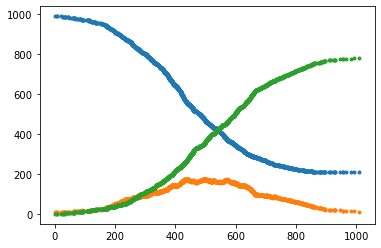

In [29]:
X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
plt.plot(T,X0[:,0],".")
plt.plot(T,X0[:,1],".")
plt.plot(T,X0[:,2],".")

## Make many simulations, one after the other

In [30]:
for i in range(10):
    X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
    X0[-1] = X0[0]
    T[-1] = 0

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#plt.style.use('seaborn-poster')
%matplotlib inline


## Numerically solve the SIR model

In [32]:
β=0.02
μ=0.01
F = lambda t, s: [-β*s[0]*s[1],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.99, 0.01,0.0], t_eval=t_eval)

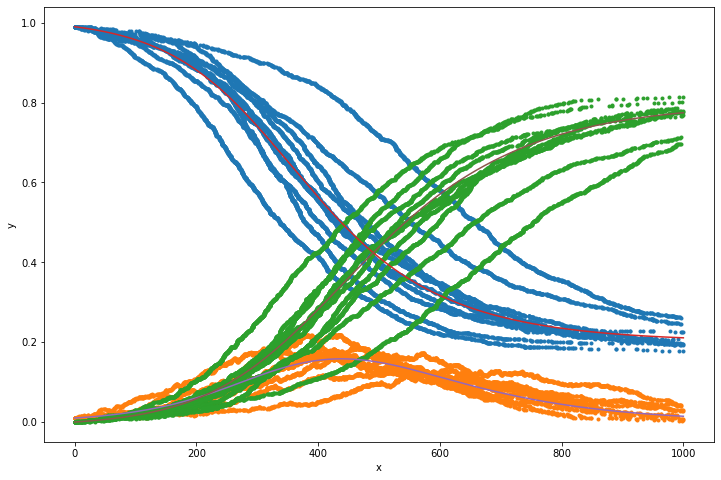

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(T,X0[:,0]/1000.0,".")
plt.plot(T,X0[:,1]/1000.0,".")
plt.plot(T,X0[:,2]/1000.0,".")
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## SIRS and endemic transition

In [3]:
# SIRS setting
# S + I -[β]-> 2 I
#     I -[μ]-> R
#     R -[η]-> S

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    #print(x,"\n",k,"\n")
    tot = sum(x)
    return np.array([k[0]*x[0]*x[1]/tot, 
                     k[1]*x[1], k[2]*x[2] ]  )


In [4]:
np.random.seed(2521623)

X0 = np.zeros([1,3])
X0[0] = [333 , 333, 334]
T = np.zeros(1)

M = np.array([[-1, 1, 0] ,# Infectious reaction
              [0,-1,1] , # I->R Recovery reaction
              [1,0,-1] ]) # R->S

k = np.array([0.02, 0.01, 0.01] )  # contact rate and recovery rate

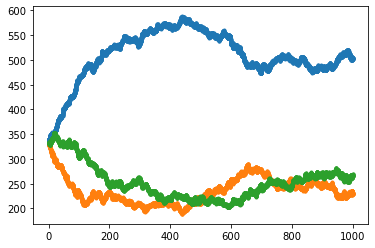

In [5]:
X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
plt.plot(T,X0[:,0],".")
plt.plot(T,X0[:,1],".")
plt.plot(T,X0[:,2],".")

In [6]:
for i in range(10):
    X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
    X0[-1] = X0[0]
    T[-1] = 0

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#plt.style.use('seaborn-poster')
%matplotlib inline


In [8]:
β=0.02
μ=0.01
η=0.01
F = lambda t, s: [-β*s[0]*s[1]+η*s[2],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]-η*s[2]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.333, 0.333,0.334], t_eval=t_eval)

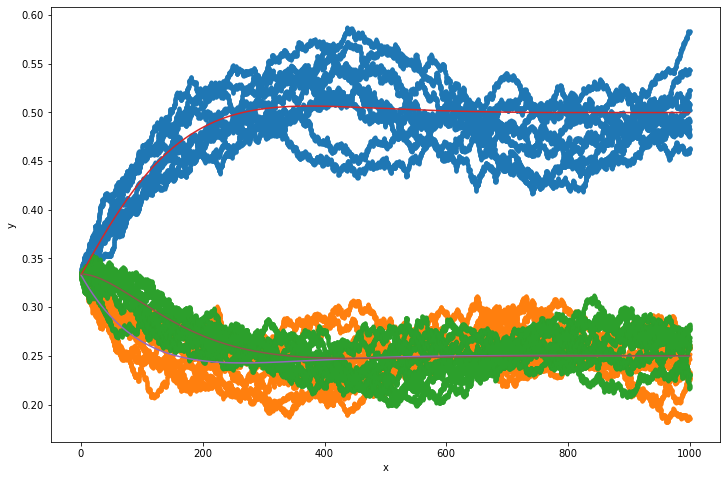

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(T,X0[:,0]/1000.0,".")
plt.plot(T,X0[:,1]/1000.0,".")
plt.plot(T,X0[:,2]/1000.0,".")
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

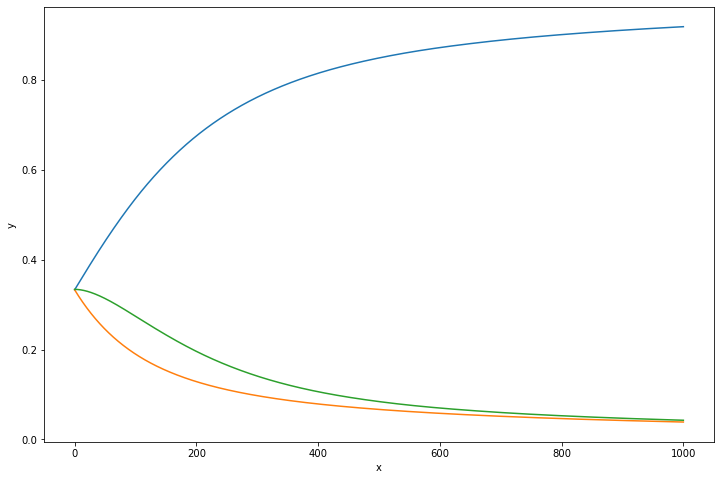

In [27]:
β=0.01
μ=0.01
η=0.01
F = lambda t, s: [-β*s[0]*s[1]+η*s[2],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]-η*s[2]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.333, 0.333,0.334], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()